#Dating in the Big Data Era

Online dating has become a popular way to meet new people and possibly find true love. Just imagine all the data these dating apps and websites collect from different people that sign up. Data is gold for all businesses.

Have you ever thougt how these dating apps decide to pair potential couples? Machine Learning algorithms and Artificial Intelligence are being used to reach accurated matches. The more the data, better the matches, that simple.

So how they collect the amount of data to start making good predictions?

With permission from users, many dating apps and sites gain insightful data from other sites (you have probably taken online quizzes), social media platforms and shoping sites. This kind of data is very important because it can reveal much about a person. Dating apps collect this info to improve their matches.

Dating apps also use collaborative filtering such Netflix and Amazon, this way they get better matches based in factors like their most watched shows and the kind of products they buy.  It's more trustful to get conclusions from data than questionaire data. People tend to lie about their weaknesses.

Bumble and other dating apps have the option to link you social media to your dating app profile. What you may miss is that this way, you are providing them with detailed information about your personality.

# Analizing 200 Bumble profiles

I personally harvested 200 Bumble profiles to analize the data and look for information that can give us an idea of these people. You can check  out my post at Data Driven Investor Blog to read more about this project: https://medium.com/datadriveninvestor/dating-in-the-big-data-and-ai-era-410d1011aec5

In [1]:
#Installing and importing libraries needed to analize the data
!pip install wordcloud
!pip install nltk
!pip3 install torch
!pip3 install torchvision
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer as countVectorizer
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
# Open text file and read in data as `text`
with open('dating_profiles_200.txt', 'r') as f:
    text = f.read()

In [0]:
#Create a dataframe
import pandas
df = pandas.read_table('dating_profiles_200.txt')

In [55]:
df.rename(columns=df.iloc[-1]).drop(df.index[-1])
df.rename(columns = {"Live music, Stanley Kubrik movies. Grilling poolside. Town carnivals, weird cats. Guitars, Sushi, 80's horror. Motorcycles. Vintage shops. Vinyl records. Astronomy (Hail Sagan!). Let's explore an abandoned building together.": 'Profile'}, inplace = True)
df.head()

,Profile
0,"Normal, passionate, polite, laid back, athleti..."
1,Minnesota boy in Texas! Loves to travel and pa...
2,I'm a pretty laid back type of guy. I love roc...
3,Here's a gift you'll want to give yourself: a ...
4,"I try really hard to be a nice person, because..."


In [56]:
#Let's check out the first 10 lines
df.head(10)
#df.info()

,Profile
0,"Normal, passionate, polite, laid back, athleti..."
1,Minnesota boy in Texas! Loves to travel and pa...
2,I'm a pretty laid back type of guy. I love roc...
3,Here's a gift you'll want to give yourself: a ...
4,"I try really hard to be a nice person, because..."
5,Looking for a relationship that lasts as long ...
6,"What to say about me, let's be honest for once..."
7,I'm dorky and artsy. Love movies and games of ...
8,"I like to cook, play music, I've recently gott..."
9,"A fun loving person, a proud citizen of this e..."


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 1 columns):
Profile    282 non-null object
dtypes: object(1)
memory usage: 2.3+ KB


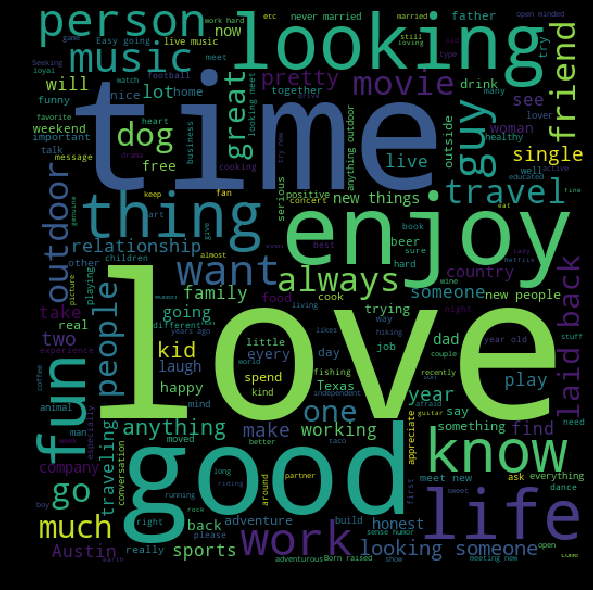

In [58]:
profile_words = ' '.join(list(df['Profile']))
profile_wc = WordCloud(width = 512,height = 512).generate(profile_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(profile_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()
profile_wc.to_file("first_review.png")

We can see in the wordcloud than the most common words used are:

**Love:** This could be for two possibles ways: they are describing something they love to do or they are looking for love.

**Looking: **They are let us know that they are looking for something: possibly a serious relationship or just dating.

**Good:** They may be describing something they like to do or enjoy.

**Enjoy:** Another word to describe things they like to do.

**Time: **Time seems to be an important thing for these people. They may have or no have time to dedicate to a possibly match.

**Dog:** Austin looks like a dog friendly city and it's an important factor for these people. They may love or own a dog.

**Movie: **A popular and common hobbie in all these profiles.

**Outdoor: **They all seems to enjoy outdoor activities.

**Travel: ** It seems that it's a must their possibly match enjoys to travel.

**Friend:** One of the most important things in their profiles is that they mention friend, so they may appreciate a good friendship.











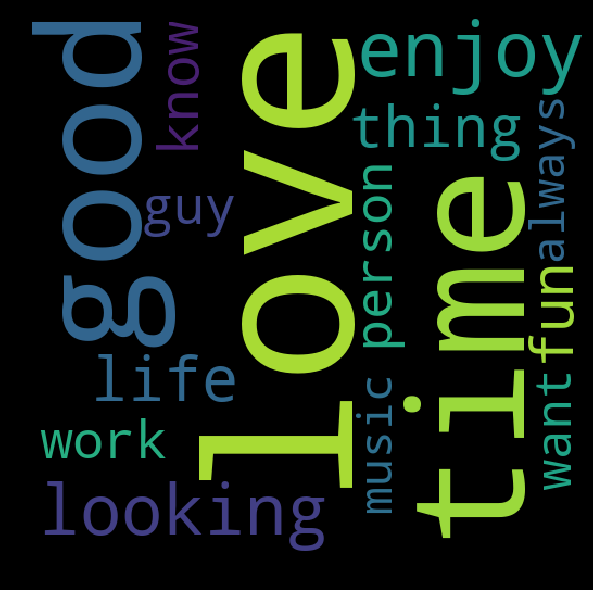

In [59]:
#Let's create another wordcloud with the 15 most common words used in the same profiles
profile_words = ' '.join(list(df['Profile']))
profile_wc = WordCloud(width = 512,height = 512, max_words=15).generate(profile_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(profile_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


In [60]:
#Let's count the distinct words from the profiles
import re
from collections import Counter

with open('dating_profiles_200.txt', 'r') as f:
    passage = f.read()

words = re.findall(r'\w+', passage)

cap_words = [word.upper() for word in words]

word_counts = Counter(cap_words)
Counter(cap_words)


Counter({'LIVE': 22,
         'MUSIC': 33,
         'STANLEY': 1,
         'KUBRIK': 1,
         'MOVIES': 20,
         'GRILLING': 1,
         'POOLSIDE': 1,
         'TOWN': 5,
         'CARNIVALS': 1,
         'WEIRD': 2,
         'CATS': 1,
         'GUITARS': 1,
         'SUSHI': 3,
         '80': 2,
         'S': 73,
         'HORROR': 1,
         'MOTORCYCLES': 1,
         'VINTAGE': 1,
         'SHOPS': 1,
         'VINYL': 1,
         'RECORDS': 3,
         'ASTRONOMY': 1,
         'HAIL': 1,
         'SAGAN': 1,
         'LET': 24,
         'EXPLORE': 4,
         'AN': 27,
         'ABANDONED': 1,
         'BUILDING': 2,
         'TOGETHER': 10,
         'NORMAL': 1,
         'PASSIONATE': 2,
         'POLITE': 1,
         'LAID': 20,
         'BACK': 32,
         'ATHLETIC': 3,
         'ADVENTUROUS': 6,
         'MAN': 11,
         'SEEKS': 2,
         'WOMAN': 12,
         'WITH': 102,
         'SIMILAR': 3,
         'INTERESTS': 4,
         'HAVE': 93,
         'CURRENT':

In [61]:
#The 10 ccommon words used in these profiles
word_counts.most_common(10)

[('I', 603),
 ('AND', 408),
 ('TO', 349),
 ('A', 322),
 ('THE', 208),
 ('FOR', 155),
 ('M', 154),
 ('MY', 140),
 ('IN', 132),
 ('OF', 130)]

In [62]:
#Let's delete words with less than 4 letters, so we can get more insightful data
df['Profile'].str.findall('\w{4,}').str.join(' ')
df1 =df['Profile'].str.findall('\w{5,}').str.join(' ')
df1.head(15)
df1 = df1.astype(str)
df1.str.lower()
df2= df1.str.lower()
df2.head(15)
Counter(" ".join(df2).split()).most_common(50)


[('looking', 79),
 ('enjoy', 47),
 ('things', 43),
 ('someone', 35),
 ('people', 33),
 ('music', 32),
 ('outdoors', 30),
 ('person', 30),
 ('about', 30),
 ('anything', 27),
 ('being', 25),
 ('always', 24),
 ('travel', 23),
 ('friends', 23),
 ('going', 21),
 ('would', 20),
 ('great', 20),
 ('family', 20),
 ('pretty', 19),
 ('movies', 19),
 ('years', 19),
 ('single', 18),
 ('austin', 16),
 ('never', 16),
 ('there', 16),
 ('working', 16),
 ('relationship', 15),
 ('traveling', 15),
 ('sports', 15),
 ('other', 14),
 ('married', 14),
 ('country', 14),
 ('honest', 13),
 ('company', 13),
 ('myself', 13),
 ('woman', 12),
 ('every', 12),
 ('loves', 12),
 ('happy', 12),
 ('important', 12),
 ('texas', 11),
 ('trying', 11),
 ('right', 11),
 ('partner', 11),
 ('laugh', 11),
 ('spend', 11),
 ('something', 11),
 ('outside', 11),
 ('having', 10),
 ('father', 10)]

# Creating new Bumble profiles, learning from these 200 Bumble profiles. Let the fun begins!

# Character-Level LSTM in PyTorch
 
 I'll create a character-level LSTM with PyTorch. The network will train character by character on the 200 Bumble profiles I used before, then generate new profiles, character by character. This model will be able to generate new Bumble profiles  based on these profies!

This network is based off of Andrej Karpathy's post on RNNs and implementation in Torch. Below is the general architecture of the character-wise RNN.
![alt text](https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/92534a85ac795dc493525b095e0ac72c7789bb9e/recurrent-neural-networks/char-rnn/assets/charseq.jpeg)



First let's load in our required resources for data loading and model creation.


In [0]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F

**Load in Data**

Then, we'll load the 200 Bumble profiles text file and convert it into integers for our network to use.


In [0]:
# Open text file and read in data as `text`
with open('dating_profiles_200.txt', 'r') as f:
    text = f.read()

Let's check out the first 800 characters, make sure everything is peachy.

In [65]:
text[:800]

"\ufeffLive music, Stanley Kubrik movies. Grilling poolside. Town carnivals, weird cats. Guitars, Sushi, 80's horror. Motorcycles. Vintage shops. Vinyl records. Astronomy (Hail Sagan!). Let's explore an abandoned building together.\nNormal, passionate, polite, laid back, athletic, adventurous man seeks woman with similar interests. Have current passport and love to travel! I live in downtown Austin and would like to own two of every animal. I like peanut butter and bacon sandwiches and having other people make my bed.\nMinnesota boy in Texas! Loves to travel and participate in anything outdoors. Let's grab coffee or a drink.\nI'm a pretty laid back type of guy. I love rock, history and documentaries. I enjoy road trips and cheesy things in life. One of the few looking for an actual relationship.\nHe"

**Tokenization**

In the cells, below, I'm creating a couple dictionaries to convert the characters to and from integers. Encoding the characters as integers makes it easier to use as input in the network.


In [0]:
# Encode the text and map each character to an integer and vice versa

# we create two dictionaries:
# 1. int2char, which maps integers to characters
# 2. char2int, which maps characters to unique integers
chars = tuple(set(text))
int2char = dict(enumerate(chars))
char2int = {ch: ii for ii, ch in int2char.items()}

# encode the text
encoded = np.array([char2int[ch] for ch in text])

And we can see those same characters from above, encoded as integers.

In [67]:
encoded[:800]

array([24,  7,  8, 25, 60, 71, 66, 10, 77,  8, 51, 15, 71,  9, 55, 83, 19,
       64, 60, 72, 71, 74, 10, 53, 54,  8, 40, 71, 66, 32, 25,  8, 60, 77,
       44, 71, 35, 54,  8, 64, 64,  8, 19, 69, 71, 18, 32, 32, 64, 77,  8,
       37, 60, 44, 71,  2, 32, 22, 19, 71, 51, 83, 54, 19,  8, 25, 83, 64,
       77, 15, 71, 22, 60,  8, 54, 37, 71, 51, 83, 55, 77, 44, 71, 35, 10,
        8, 55, 83, 54, 77, 15, 71,  9, 10, 77, 33,  8, 15, 71, 78, 73, 67,
       77, 71, 33, 32, 54, 54, 32, 54, 44, 71, 84, 32, 55, 32, 54, 51, 72,
       51, 64, 60, 77, 44, 71, 56,  8, 19, 55, 83, 69, 60, 71, 77, 33, 32,
       18, 77, 44, 71, 56,  8, 19, 72, 64, 71, 54, 60, 51, 32, 54, 37, 77,
       44, 71, 47, 77, 55, 54, 32, 19, 32, 66, 72, 71, 79, 21, 83,  8, 64,
       71,  9, 83, 69, 83, 19, 68, 38, 44, 71,  7, 60, 55, 67, 77, 71, 60,
       16, 18, 64, 32, 54, 60, 71, 83, 19, 71, 83, 53, 83, 19, 37, 32, 19,
       60, 37, 71, 53, 10,  8, 64, 37,  8, 19, 69, 71, 55, 32, 69, 60, 55,
       33, 60, 54, 44, 48

**Pre-processing the data**

As you can see in our char-RNN image above, our LSTM expects an input that is one-hot encoded meaning that each character is converted into an integer (via our created dictionary) and then converted into a column vector where only it's corresponding integer index will have the value of 1 and the rest of the vector will be filled with 0's. Since we're one-hot encoding the data, let's make a function to do that!


In [0]:
def one_hot_encode(arr, n_labels):
    
    # Initialize the the encoded array
    one_hot = np.zeros((np.multiply(*arr.shape), n_labels), dtype=np.float32)
    
    # Fill the appropriate elements with ones
    one_hot[np.arange(one_hot.shape[0]), arr.flatten()] = 1.
    
    # Finally reshape it to get back to the original array
    one_hot = one_hot.reshape((*arr.shape, n_labels))
    
    return one_hot

In [69]:
# Check that the function works as expected
test_seq = np.array([[3, 5, 1]])
one_hot = one_hot_encode(test_seq, 8)

print(one_hot)

[[[0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0.]]]



**Making training mini-batches**

To train on this data, we also want to create mini-batches for training. Remember that we want our batches to be multiple sequences of some desired number of sequence steps. 


We'll take the encoded characters (passed in as the arr parameter) and split them into multiple sequences, given by batch_size. Each of our sequences will be seq_length long.

**Creating Batches**

1. The first thing we need to do is discard some of the text so we only have completely full mini-batches.

Each batch contains $N \times M$ characters, where $N$ is the batch size (the number of sequences in a batch) and $M$ is the seq_length or number of time steps in a sequence. Then, to get the total number of batches, $K$, that we can make from the array arr, you divide the length of arr by the number of characters per batch. Once you know the number of batches, you can get the total number of characters to keep from arr, $N * M * K$.

2. After that, we need to split arr into $N$ batches.

You can do this using arr.reshape(size) where size is a tuple containing the dimensions sizes of the reshaped array. We know we want $N$ sequences in a batch, so let's make that the size of the first dimension. For the second dimension, you can use -1 as a placeholder in the size, it'll fill up the array with the appropriate data for you. After this, you should have an array that is $N \times (M * K)$.

3. Now that we have this array, we can iterate through it to get our mini-batches.

The idea is each batch is a $N \times M$ window on the $N \times (M * K)$ array. For each subsequent batch, the window moves over by seq_length. We also want to create both the input and target arrays. Remember that the targets are just the inputs shifted over by one character. The way I like to do this window is use range to take steps of size n_steps from $0$ to arr.shape[1], the total number of tokens in each sequence. That way, the integers you get from range always point to the start of a batch, and each window is seq_length wide.

We will write the code for creating batches in the function below:



In [0]:
def get_batches(arr, batch_size, seq_length):
    '''Create a generator that returns batches of size
       batch_size x seq_length from arr.
       
       Arguments
       ---------
       arr: Array you want to make batches from
       batch_size: Batch size, the number of sequences per batch
       seq_length: Number of encoded chars in a sequence
    '''
    
    batch_size_total = batch_size * seq_length
    # total number of batches we can make
    n_batches = len(arr)//batch_size_total
    
    # Keep only enough characters to make full batches
    arr = arr[:n_batches * batch_size_total]
    # Reshape into batch_size rows
    arr = arr.reshape((batch_size, -1))
    
    # iterate through the array, one sequence at a time
    for n in range(0, arr.shape[1], seq_length):
        # The features
        x = arr[:, n:n+seq_length]
        # The targets, shifted by one
        y = np.zeros_like(x)
        try:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, n+seq_length]
        except IndexError:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, 0]
        yield x, y

**Test Your Implementation**

Now I'll make some data sets and we can check out what's going on as we batch data. I'm going to use a batch size of 8 and 50 sequence steps.


In [0]:
batches = get_batches(encoded, 8, 50)
x, y = next(batches)

In [72]:
# Printing out the first 10 items in a sequence
print('x\n', x[:10, :10])
print('\ny\n', y[:10, :10])

x
 [[24  7  8 25 60 71 66 10 77  8]
 [19 69 64 60 71  8 19 37 60 18]
 [71 32 18 55  8 66  8 77 55  8]
 [ 8 71 19 60 54 37 44 48 42 32]
 [71 40  8 19 37 71 32  0 71 69]
 [71 55 32 71 60 16 60 54 51  8]
 [60 71 18 54 60 55 55 72 71 53]
 [32 71 77 18 60 19 37 71 55  8]]

y
 [[ 7  8 25 60 71 66 10 77  8 51]
 [69 64 60 71  8 19 37 60 18 60]
 [32 18 55  8 66  8 77 55  8 51]
 [71 19 60 54 37 44 48 42 32 22]
 [40  8 19 37 71 32  0 71 69 10]
 [55 32 71 60 16 60 54 51  8 77]
 [71 18 54 60 55 55 72 71 53 10]
 [71 77 18 60 19 37 71 55  8 66]]


Although the exact numbers may be different. Check to make sure the data is shifted over one step for y.

**Defining the network with PyTorch**

Below is where you'll define the network.


I will use PyTorch to define the architecture of the network, start by defining the layers and operations we want. Then, define a method for the forward pass. You've also been given a method for predicting characters.
Model Structure

In __init__ the suggested structure is as follows:

    Create and store the necessary dictionaries (this has been done for you)
    Define an LSTM layer that takes as params: an input size (the number of characters), a hidden layer size n_hidden, a number of layers n_layers, a dropout probability drop_prob, and a batch_first boolean (True, since we are batching)
    Define a dropout layer with dropout_prob
    Define a fully-connected layer with params: input size n_hidden and output size (the number of characters)
    Finally, initialize the weights (again, this has been given)

Note that some parameters have been named and given in the __init__ function, and we use them and store them by doing something like self.drop_prob = drop_prob.


**LSTM Inputs/Outputs**

You can create a basic LSTM layer as follows

self.lstm = nn.LSTM(input_size, n_hidden, n_layers, 
                            dropout=drop_prob, batch_first=True)

where input_size is the number of characters this cell expects to see as sequential input, and n_hidden is the number of units in the hidden layers in the cell. And we can add dropout by adding a dropout parameter with a specified probability; this will automatically add dropout to the inputs or outputs. Finally, in the forward function, we can stack up the LSTM cells into layers using .view. With this, you pass in a list of cells and it will send the output of one cell into the next cell.

We also need to create an initial hidden state of all zeros. This is done like so

self.init_hidden()


In [73]:
# Check if GPU is available
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
else: 
    print('No GPU available, training on CPU; consider making n_epochs very small.')

Training on GPU!


In [0]:
class CharRNN(nn.Module):
    
    def __init__(self, tokens, n_hidden=512, n_layers=3,
                               drop_prob=1, lr=0.0001):
        super().__init__()
        self.drop_prob = drop_prob
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.lr = lr
        
        # Creating character dictionaries
        self.chars = tokens
        self.int2char = dict(enumerate(self.chars))
        self.char2int = {ch: ii for ii, ch in self.int2char.items()}
        
        ## Define the LSTM
        self.lstm = nn.LSTM(len(self.chars), n_hidden, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        ## Define a dropout layer
        self.dropout = nn.Dropout(drop_prob)
        
        ##Define the final, fully-connected output layer
        self.fc = nn.Linear(n_hidden, len(self.chars))
      
    
    def forward(self, x, hidden):
        ''' Forward pass through the network. 
            These inputs are x, and the hidden/cell state `hidden`. '''
                
        ## Get the outputs and the new hidden state from the lstm
        r_output, hidden = self.lstm(x, hidden)
        
        ## Pass through a dropout layer
        out = self.dropout(r_output)
        
        # Stack up LSTM outputs using view
        # you may need to use contiguous to reshape the output
        out = out.contiguous().view(-1, self.n_hidden)
        
        ## Put x through the fully-connected layer
        out = self.fc(out)
        
        # return the final output and the hidden state
        return out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x n_hidden,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_(),
                      weight.new(self.n_layers, batch_size, self.n_hidden).zero_())
        
        return hidden

**Time to train**

The train function gives us the ability to set the number of epochs, the learning rate, and other parameters.

Below we're using an Adam optimizer and cross entropy loss since we are looking at character class scores as output. We calculate the loss and perform backpropagation, as usual!

A couple of details about training:

        Within the batch loop, we detach the hidden state from its history; this time setting it equal to a new tuple variable because an LSTM has a hidden state that is a tuple of the hidden and cell states.
        We use clip_grad_norm_ to help prevent exploding gradients.



In [0]:
def train(net, data, epochs=20, batch_size=10, seq_length=50, lr=0.0001, clip=5, val_frac=0.1, print_every=10):
    ''' Training a network 
    
        Arguments
        ---------
        
        net: CharRNN network
        data: text data to train the network
        epochs: Number of epochs to train
        batch_size: Number of mini-sequences per mini-batch, aka batch size
        seq_length: Number of character steps per mini-batch
        lr: learning rate
        clip: gradient clipping
        val_frac: Fraction of data to hold out for validation
        print_every: Number of steps for printing training and validation loss
    
    '''
    net.train()
    
    opt = torch.optim.Adam(net.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    # Create training and validation data
    val_idx = int(len(data)*(1-val_frac))
    data, val_data = data[:val_idx], data[val_idx:]
    
    if(train_on_gpu):
        net.cuda()
    
    counter = 0
    n_chars = len(net.chars)
    for e in range(epochs):
        # Initialize hidden state
        h = net.init_hidden(batch_size)
        
        for x, y in get_batches(data, batch_size, seq_length):
            counter += 1
            
            # One-hot encode our data and make them Torch tensors
            x = one_hot_encode(x, n_chars)
            inputs, targets = torch.from_numpy(x), torch.from_numpy(y)
            
            if(train_on_gpu):
                inputs, targets = inputs.cuda(), targets.cuda()

            # Creating new variables for the hidden state, otherwise
            # we'd backprop through the entire training history
            h = tuple([each.data for each in h])

            # Zero accumulated gradients
            net.zero_grad()
            
            # Get the output from the model
            output, h = net(inputs, h)
            
            # Calculate the loss and perform backprop
            loss = criterion(output, targets.view(batch_size*seq_length))
            loss.backward()
            # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(net.parameters(), clip)
            opt.step()
            
            # Loss stats
            if counter % print_every == 0:
                # Get validation loss
                val_h = net.init_hidden(batch_size)
                val_losses = []
                net.eval()
                for x, y in get_batches(val_data, batch_size, seq_length):
                    # One-hot encode our data and make them Torch tensors
                    x = one_hot_encode(x, n_chars)
                    x, y = torch.from_numpy(x), torch.from_numpy(y)
                    
                    # Creating new variables for the hidden state, otherwise
                    # we'd backprop through the entire training history
                    val_h = tuple([each.data for each in val_h])
                    
                    inputs, targets = x, y
                    if(train_on_gpu):
                        inputs, targets = inputs.cuda(), targets.cuda()

                    output, val_h = net(inputs, val_h)
                    val_loss = criterion(output, targets.view(batch_size*seq_length))
                
                    val_losses.append(val_loss.item())
                
                net.train() # reset to train mode after iterationg through validation data
                
                print("Epoch: {}/{}...".format(e+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.4f}...".format(loss.item()),
                      "Val Loss: {:.4f}".format(np.mean(val_losses)))

**Instantiating the model**

Now we can actually train the network. First we'll create the network itself, with some given hyperparameters. Then, define the mini-batches sizes, and start training!


In [76]:
# Define and print the net
n_hidden=512
n_layers=20

net = CharRNN(chars, n_hidden, n_layers)
print(net)

CharRNN(
  (lstm): LSTM(85, 512, num_layers=20, batch_first=True, dropout=1)
  (dropout): Dropout(p=1)
  (fc): Linear(in_features=512, out_features=85, bias=True)
)


In [0]:
batch_size = 32
seq_length = 100
n_epochs =1000 # start smaller if you are just testing initial behavior

# Train the model
train(net, encoded, epochs=n_epochs, batch_size=batch_size, seq_length=seq_length, lr=0.0001, print_every=10)


Epoch: 1/1000... Step: 10... Loss: 4.4391... Val Loss: 4.4338
Epoch: 2/1000... Step: 20... Loss: 4.4379... Val Loss: 4.4325
Epoch: 2/1000... Step: 30... Loss: 4.4365... Val Loss: 4.4312
Epoch: 3/1000... Step: 40... Loss: 4.4352... Val Loss: 4.4299
Epoch: 4/1000... Step: 50... Loss: 4.4339... Val Loss: 4.4286
Epoch: 4/1000... Step: 60... Loss: 4.4325... Val Loss: 4.4273
Epoch: 5/1000... Step: 70... Loss: 4.4313... Val Loss: 4.4260
Epoch: 6/1000... Step: 80... Loss: 4.4300... Val Loss: 4.4247
Epoch: 6/1000... Step: 90... Loss: 4.4286... Val Loss: 4.4234
Epoch: 7/1000... Step: 100... Loss: 4.4274... Val Loss: 4.4221
Epoch: 8/1000... Step: 110... Loss: 4.4261... Val Loss: 4.4208
Epoch: 8/1000... Step: 120... Loss: 4.4247... Val Loss: 4.4195
Epoch: 9/1000... Step: 130... Loss: 4.4235... Val Loss: 4.4181
Epoch: 10/1000... Step: 140... Loss: 4.4222... Val Loss: 4.4168
Epoch: 10/1000... Step: 150... Loss: 4.4208... Val Loss: 4.4155
Epoch: 11/1000... Step: 160... Loss: 4.4197... Val Loss: 4.414

**Getting the best model**

To set your hyperparameters to get the best performance, you'll want to watch the training and validation losses. If your training loss is much lower than the validation loss, you're overfitting. Increase regularization (more dropout) or use a smaller network. If the training and validation losses are close, you're underfitting so you can increase the size of the network.


**Hyperparameters**

Here are the hyperparameters for the network.

In defining the model:

    n_hidden - The number of units in the hidden layers.
    n_layers - Number of hidden LSTM layers to use.

We assume that dropout probability and learning rate will be kept at the default, in this example.

And in training:

    batch_size - Number of sequences running through the network in one pass.
    seq_length - Number of characters in the sequence the network is trained on. Larger is better typically, the network will learn more long range dependencies. But it takes longer to train. 100 is typically a good number here.
    lr - Learning rate for training

Here's some good advice from Andrej Karpathy on training the network. I'm going to copy it in here for your benefit, but also link to where it originally came from. https://github.com/karpathy/char-rnn#tips-and-tricks

# Tips and Tricks
**Monitoring Validation Loss vs. Training Loss**

    If you're somewhat new to Machine Learning or Neural Networks it can take a bit of expertise to get good models. The most important quantity to keep track of is the difference between your training loss (printed during training) and the validation loss (printed once in a while when the RNN is run on the validation data (by default every 1000 iterations)). In particular:

        If your training loss is much lower than validation loss then this means the network might be overfitting. Solutions to this are to decrease your network size, or to increase dropout. For example you could try dropout of 0.5 and so on.
        If your training/validation loss are about equal then your model is underfitting. Increase the size of your model (either number of layers or the raw number of neurons per layer)

**Approximate number of parameters**

    The two most important parameters that control the model are n_hidden and n_layers. I would advise that you always use n_layers of either 2/3. The n_hidden can be adjusted based on how much data you have. The two important quantities to keep track of here are:

        The number of parameters in your model. This is printed when you start training.
        The size of your dataset. 1MB file is approximately 1 million characters.

    These two should be about the same order of magnitude. It's a little tricky to tell. Here are some examples:

        I have a 100MB dataset and I'm using the default parameter settings (which currently print 150K parameters). My data size is significantly larger (100 mil >> 0.15 mil), so I expect to heavily underfit. I am thinking I can comfortably afford to make n_hidden larger.
        I have a 10MB dataset and running a 10 million parameter model. I'm slightly nervous and I'm carefully monitoring my validation loss. If it's larger than my training loss then I may want to try to increase dropout a bit and see if that helps the validation loss.

**Best models strategy**

    The winning strategy to obtaining very good models (if you have the compute time) is to always err on making the network larger (as large as you're willing to wait for it to compute) and then try different dropout values (between 0,1). Whatever model has the best validation performance (the loss, written in the checkpoint filename, low is good) is the one you should use in the end.

    It is very common in deep learning to run many different models with many different hyperparameter settings, and in the end take whatever checkpoint gave the best validation performance.

    By the way, the size of your training and validation splits are also parameters. Make sure you have a decent amount of data in your validation set or otherwise the validation performance will be noisy and not very informative.


**Checkpoint**

After training, we'll save the model so we can load it again later if we need too. Here I'm saving the parameters needed to create the same architecture, the hidden layer hyperparameters and the text characters.


In [0]:
# Change the name, for saving multiple files
model_name = 'rnn_100_epoch.net'

checkpoint = {'n_hidden': net.n_hidden,
              'n_layers': net.n_layers,
              'state_dict': net.state_dict(),
              'tokens': net.chars}

with open(model_name, 'wb') as f:
    torch.save(checkpoint, f)

# Making Predictions

Now that the model is trained, we'll want to sample from it and make predictions about next characters! To sample, we pass in a character and have the network predict the next character. Then we take that character, pass it back in, and get another predicted character. Just keep doing this and you'll generate a bunch of text!
A note on the predict function

The output of our RNN is from a fully-connected layer and it outputs a distribution of next-character scores.

    To actually get the next character, we apply a softmax function, which gives us a probability distribution that we can then sample to predict the next character.

Top K sampling

Our predictions come from a categorical probability distribution over all the possible characters. We can make the sample text and make it more reasonable to handle (with less variables) by only considering some $K$ most probable characters. This will prevent the network from giving us completely absurd characters while allowing it to introduce some noise and randomness into the sampled text. Read more about topk, here. https://pytorch.org/docs/stable/torch.html#torch.topk

In [0]:
def predict(net, char, h=None, top_k=None):
        ''' Given a character, predict the next character.
            Returns the predicted character and the hidden state.
        '''
        
        # Tensor inputs
        x = np.array([[net.char2int[char]]])
        x = one_hot_encode(x, len(net.chars))
        inputs = torch.from_numpy(x)
        
        if(train_on_gpu):
            inputs = inputs.cuda()
        
        # Detach hidden state from history
        h = tuple([each.data for each in h])
        # get the output of the model
        out, h = net(inputs, h)

        # Get the character probabilities
        p = F.softmax(out, dim=1).data
        if(train_on_gpu):
            p = p.cpu() # move to cpu
        
        # Get top characters
        if top_k is None:
            top_ch = np.arange(len(net.chars))
        else:
            p, top_ch = p.topk(top_k)
            top_ch = top_ch.numpy().squeeze()
        
        # Select the likely next character with some element of randomness
        p = p.numpy().squeeze()
        char = np.random.choice(top_ch, p=p/p.sum())
        
        # Return the encoded value of the predicted char and the hidden state
        return net.int2char[char], h

 **Priming and generating text**

Typically you'll want to prime the network so you can build up a hidden state. Otherwise the network will start out generating characters at random. In general the first bunch of characters will be a little rough since it hasn't built up a long history of characters to predict from.


In [0]:
def sample(net, size, prime="I'm looking for", top_k=None):
        
    if(train_on_gpu):
        net.cuda()
    else:
        net.cpu()
    
    net.eval() # eval mode
    
    # First off, run through the prime characters
    chars = [ch for ch in prime]
    h = net.init_hidden(1)
    for ch in prime:
        char, h = predict(net, ch, h, top_k=top_k)

    chars.append(char)
    
    # Now pass in the previous character and get a new one
    for ii in range(size):
        char, h = predict(net, chars[-1], h, top_k=top_k)
        chars.append(char)

    return ''.join(chars)

In [0]:
print(sample(net, 2000, prime="I'm looking for", top_k=5))

I'm looking for o o ooo  t   oa  toa   a a oeoa    t ao e eote  oaaet  o tea oee  at e e t aee  eeooaooeet eaoaoto  ee aa oot  ate ao ototaottoeooe  oote et  ooeeeaa et oe eaoeea    o oaoe t a  eo   aoeet tateo   o ao a   eeateao  ota etee e   o e o oea o  ta e ee e eaotattea etat a e t  tet a  eo  a e eaeao t   aeoa ea eea        t oea etaaetaateao eet   ee e e  o aeaoteatote e  oo t eaaa a t  oea  atte oeeoo et o   eeo ae ot eet e oteeoe  e  aaaa  t t  oaoae e ttt tt ee   teo e eeeooe a eaaet ota ottaea    e o o  teoeao o o  otaaoa ee a at e oe   e t  teot  o ea eo aa eottaa oeotaeo too    t e oe  e ae t  a  eao oeta eo  oe  eo o  eeoooaoeo   a   e ee   ee   a  aaeeaoe    e   ea   ateoeo e  o ot a eooo oteooe eot  o   aaa e e  t ttet a oo o t  e oe  oaeteteteeoee  et  oaa e  a  a  eo  o  at aet   t  o    oeetae t oeao aeeeoatooe  ee aa aeeee  e atoto attotoee   eeaa   teeao  eee a  oe ot toattaeo t o    oetaooeoeote ao et eae eaee  aeaaeee tetteaeoo   ttt  o  e   eottee   e tott  att

I need to work on the data to get better results, a dataset larger than 1MB could get us better results.

# Loading a checkpoint

In [0]:
# Here we have loaded in a model that trained over 20 epochs `rnn_20_epoch.net`
with open('rnn_20_epoch.net', 'rb') as f:
    checkpoint = torch.load(f)
    
loaded = CharRNN(checkpoint['tokens'], n_hidden=checkpoint['n_hidden'], n_layers=checkpoint['n_layers'])
loaded.load_state_dict(checkpoint['state_dict'])

In [0]:
# Sample using a loaded model
print(sample(loaded, 300, top_k=5, prime="I'm looking for"))